# Preparation from Lab 8

In lab 8 I ran the following commands in terminal: <br/>

spades.py	--careful	-t1	--pe1-1	/data/lab8/illumina_reads_R1.fastq	--pe1-2	/data/lab8/illumina_reads_R2.fastq	--pacbio	/data/lab8/pacbio_reads.fastq	-o	/home/be131-16/Colin/lab8/spades_output	<br/>

After the program finished running, I got the following warnings:

=== Error correction and assembling warnings:
 * 0:17:45.199   564M / 1G    WARN    General                 (kmer_coverage_model.cpp   : 218)   Too many erroneous kmers, the estimates might be unreliable


# Lab 9
## In terminal 

in: $ assembly-stats contigs.fasta

out: <br/>
stats for contigs.fasta <br/>
sum = 6668871, n = 179, ave = 37256.26, largest = 468307<br/>
N50 = 213892, n = 11<br/>
N60 = 195508, n = 14<br/>
N70 = 148554, n = 18<br/>
N80 = 103352, n = 23<br/>
N90 = 81820, n = 30<br/>
N100 = 128, n = 179<br/>
N_count = 0<br/>
Gaps = 0
<br/>
<br/>
in: $ assembly-stats scaffolds.fasta

out:<br/> 
stats for scaffolds.fasta<br/>
sum = 6672441, n = 173, ave = 38569.02, largest = 468307<br/>
N50 = 261858, n = 10<br/>
N60 = 253666, n = 12<br/>
N70 = 207869, n = 15<br/>
N80 = 124081, n = 20<br/>
N90 = 92098, n = 26<br/>
N100 = 128, n = 173<br/>
N_count = 144<br/>
Gaps = 7


There are 179 contigs with a total length 6,668,871 bases. The N50 for the contigs is 213,892 bases. For the scaffolds, there were 173 with a total length of 6,672,441 bases. The scaffolds N50 is 261,858. <br/>
 
The N50 is useful as a measure of the quality of the contiguity of the reads and is a higher level statistic than mean or median. Higher N50s mean that longer, more robust contigs make up 50% of overall genome, indicating more reliable assembly overall. <br/>

Mean and median contig length do not really capture the quality of data the way the N50 does. The mean gives equal weight to contigs of all lengths, but longer contigs are more desireable. The median also does not give insight to the length of the longer reads that make up half of the genome as it only reports the length of the contig that falls right in the middle of the data. <br/>

In this case, the number of scaffolds is fairly close to the number of contigs, but about 35 of the contigs were able to be stitched together. The N50 for the scaffolds is slightly larger than that for the contigs, and overall the scaffolds are longer in length than the contigs. This is not surprising if some of the larger contigs are beiing joined with others to make scaffolds.  

## Next, I used rna_hmm3.py to annotate my contig file

### I ran the following in the terminal: 

rna_hmm3.py -i /home/be131-16/Colin/lab8/spades_output/contigs.fasta -o contigs_annotation.gff<br/><br/>

### Output: 

seq_name	method	feature	start	end	evalue	strand	frame	attribute <br/>
NODE_3_length_352739_cov_8.419214	rna_hmm3	rRNA	65159	68063	0	-	NA	23S_rRNA <br/>
NODE_23_length_103352_cov_10.011827	rna_hmm3	rRNA	37580	40484	0	+	NA	23S_rRNA <br/>
NODE_6_length_279343_cov_8.754747	rna_hmm3	rRNA	457	3361	0	+	NA	23S_rRNA <br/>
NODE_1_length_468307_cov_8.955035	rna_hmm3	rRNA	161099	164003	0	+	NA	23S_rRNA<br/>
NODE_117_length_451_cov_1.006173	rna_hmm3	rRNA	184	303	8e-36	+	NA	23S_rRNA<br/>
NODE_117_length_451_cov_1.006173	rna_hmm3	rRNA	152	220	4.4e-09	-	NA	23S_rRNA<br/>
NODE_14_length_195508_cov_8.764542	rna_hmm3	rRNA	49	1592	0	-	NA	16S_rRNA<br/>
NODE_1_length_468307_cov_8.955035	rna_hmm3	rRNA	159050	160594	0	+	NA	16S_rRNA<br/>
NODE_3_length_352739_cov_8.419214	rna_hmm3	rRNA	68568	70112	0	-	NA	16S_rRNA<br/>
NODE_34_length_47877_cov_11.378513	rna_hmm3	rRNA	46286	47829	0	+	NA	16S_rRNA<br/>
NODE_23_length_103352_cov_10.011827	rna_hmm3	rRNA	35531	37075	0	+	NA	16S_rRNA<br/>
NODE_23_length_103352_cov_10.011827	rna_hmm3	rRNA	40649	40763	3.5e-21	+	NA	5S_rRNA<br/>
NODE_21_length_133461_cov_8.643403	rna_hmm3	rRNA	133332	133446	4.5e-21	-	NA	5S_rRNA<br/>
NODE_6_length_279343_cov_8.754747	rna_hmm3	rRNA	3528	3642	9.7e-21	+	NA	5S_rRNA<br/>
NODE_3_length_352739_cov_8.419214	rna_hmm3	rRNA	64880	64994	1.2e-20	-	NA	5S_rRNA<br/>
NODE_42_length_25337_cov_8.961166	rna_hmm3	rRNA	2	108	1.9e-20	+	NA	5S_rRNA<br/>
NODE_1_length_468307_cov_8.955035	rna_hmm3	rRNA	164170	164284	1.6e-20	+	NA	5S_rRNA


I deleted all lines that aren't part of the 16S ribosome sequence. 



## Using bedtools to get the 16S ribosome contig sequences 

### In the terminal I used the following command:

$ bedtools getfasta -fi /home/be131-16/Colin/lab8/spades_output/contigs.fasta -bed /home/be131-16/Colin/lab8/spades_output/contigs_annotation.gff <br/>

The output was in FASTA format and is unreasonably long to paste here. However, I got back the sequences from Nodes 14, 1, 3, 34 and 23, which are all the sequence segments for the 16S subunit. 

## Using the Ribosomal Database Project's SeqMatch tool:

I queried the five sequences from above and for each one it returned the same genus: pseudomonas. With each of the five sequences returning the same results, it seems likely that the organism from which the sequences were derived is of the pseudomonas genus. 


# Output from RAST

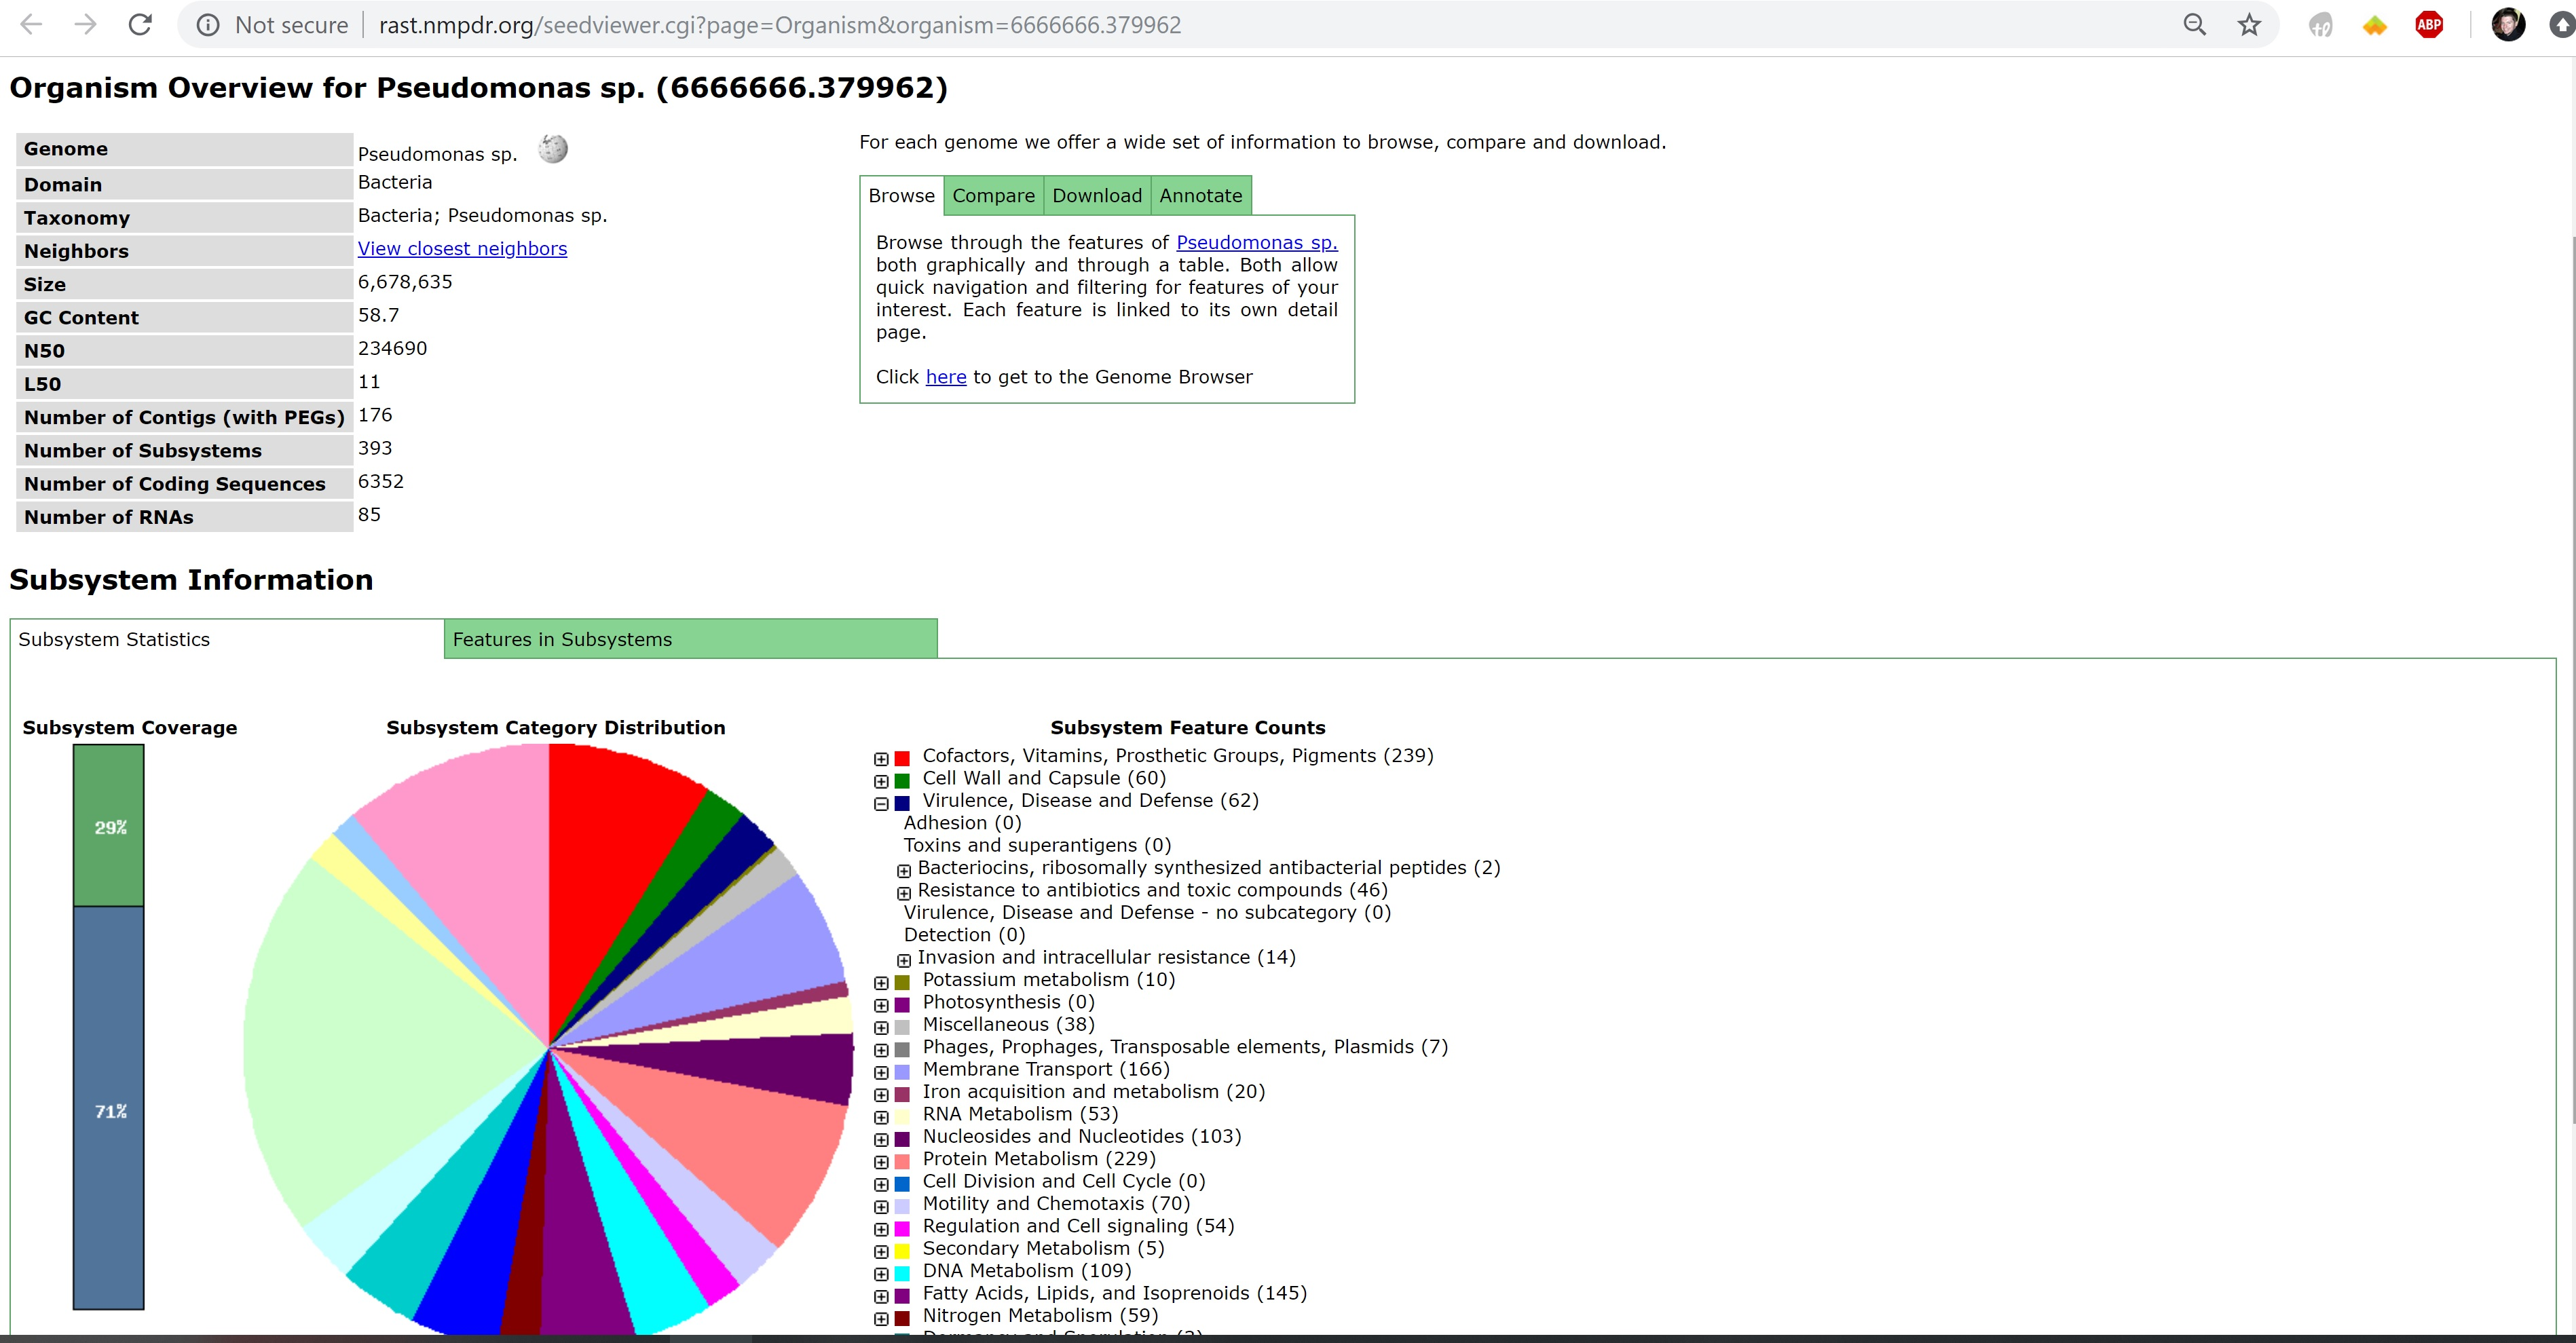